In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

Input location

In [2]:
places = {
    'Bandung': 'Bandung City, West Java, Indonesia',
    'Cimahi': 'Cimahi, West Java, Indonesia',
    'Bandung Regency': 'Bandung Regency, West Java, Indonesia',
    'West Bandung': 'West Bandung, West Java, Indonesia',
    'Sumedang': 'Sumedang, West Java'
}

In [15]:
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((107.54536 -6.92682, 107.54565 -6.927...",-6.836854,-6.969748,107.739521,107.545362,57949350,relation,13290062,-6.921553,107.611021,boundary,administrative,12,0.547048,city,Bandung,"Bandung, West Java, Java, Indonesia"
1,"POLYGON ((107.51032 -6.89818, 107.51035 -6.898...",-6.827352,-6.932861,107.576127,107.510319,57926200,relation,14935961,-6.873153,107.542310,boundary,administrative,12,0.424873,city,Cimahi,"Cimahi, West Java, Java, Indonesia"
2,"POLYGON ((107.25103 -7.19993, 107.25133 -7.200...",-6.812845,-7.309764,107.938432,107.251029,57861105,relation,14935959,-7.061342,107.634288,boundary,administrative,12,0.438800,county,Bandung,"Bandung, West Java, Java, Indonesia"
3,"POLYGON ((107.18194 -7.05813, 107.18201 -7.058...",-6.688515,-7.107184,107.746157,107.181936,58026971,relation,14935960,-6.897754,107.412429,boundary,administrative,12,0.401334,county,West Bandung,"West Bandung, West Java, Java, Indonesia"
4,"POLYGON ((107.74099 -6.85487, 107.74167 -6.857...",-6.579063,-7.040723,108.219875,107.740987,57905985,relation,14935958,-6.809871,107.981773,boundary,administrative,12,0.240010,county,Sumedang,"Sumedang, West Java, Java, Indonesia"


Street Network Orientation

[[<PolarAxes: > <PolarAxes: > <PolarAxes: >]
 [<PolarAxes: > <PolarAxes: > <PolarAxes: >]] <class 'numpy.ndarray'>
2024-06-23 02:12:00 Bandung
2024-06-23 02:12:36 Bandung Regency
2024-06-23 02:14:51 Cimahi
2024-06-23 02:15:05 Sumedang
2024-06-23 02:16:20 West Bandung


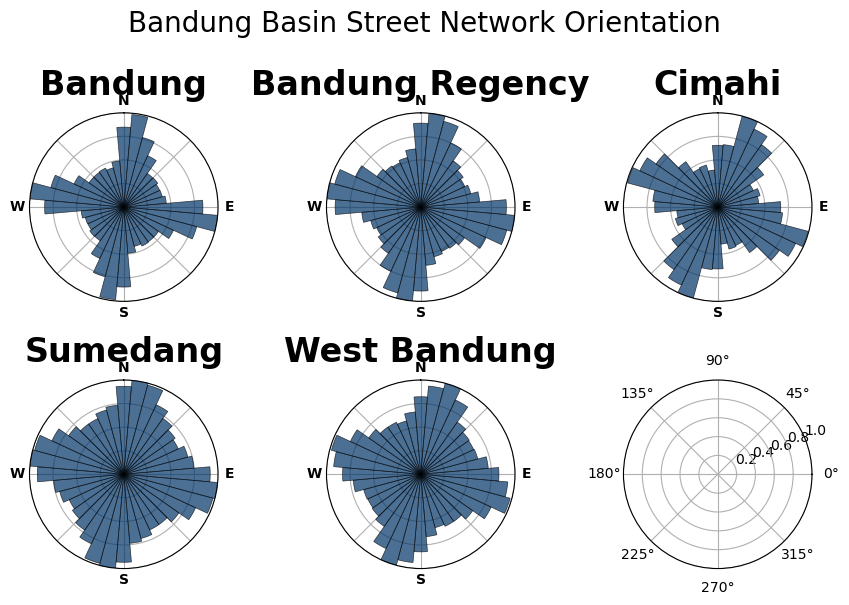

In [5]:
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 3, nrows * 3)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})
print(axes, type(axes))

for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    G = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.convert.to_undirected(G))
    fig, ax = ox.plot.plot_orientation(Gu, ax=ax, title=place, area=True)

suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 20,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("Bandung Basin Street Network Orientation", **suptitle_font)
fig.tight_layout()

References

Boeing, G. (2017). OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems, 65, 126–139.



Boeing, G. (2019).  Urban spatial order: street network orientation, configuration, and entropy. Appl Netw Sci 4, 67. https://doi.org/10.1007/s41109-019-0189-1